## [Visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html)
### - Functions to draw linear regression models
### - Fitting different kinds of models
### - Conditioning on other variables
### - Controlling the size and shape of the plot
### - Plotting a regression in other contexts

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We previously discussed functions that can accomplish this by showing the joint distribution of two variables. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. The functions discussed in this chapter will do so through the common framework of linear regression.

In the spirit of Tukey, the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. That is to say that seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use statsmodels. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
sns.set(color_codes=True)
tips = sns.load_dataset("tips")

### Functions to draw linear regression models

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) and [lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

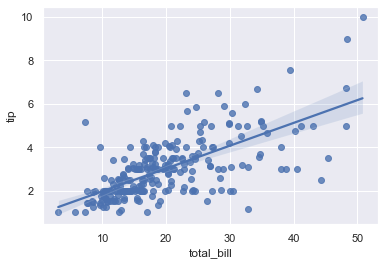

In [17]:
sns.regplot(x="total_bill", y="tip", data=tips)

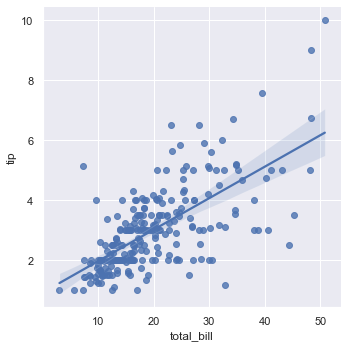

In [18]:
sns.lmplot('total_bill', 'tip', data=tips)

The only different thing from the upper result is that the figure shapes are different. \
The other main difference to know about is that <span style="color:red">regplot()</span> accepts the x and y variables in a variety of formats including simple <span style="color:red">numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame</span> object passed to data. In contrast, <span style="color:blue">lmplot()</span> has data as a required parameter and the <span style="color:blue">x and y variables must be specified as strings</span>.

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

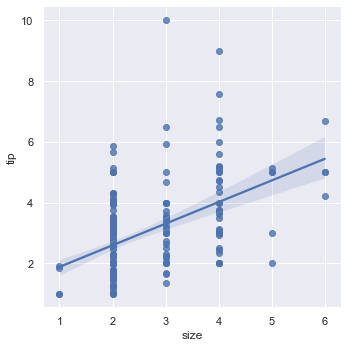

In [19]:
sns.lmplot(x="size", y="tip", data=tips)

Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

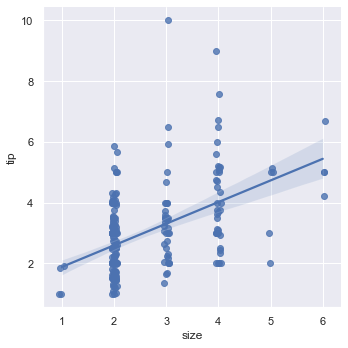

In [20]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

Another way of collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

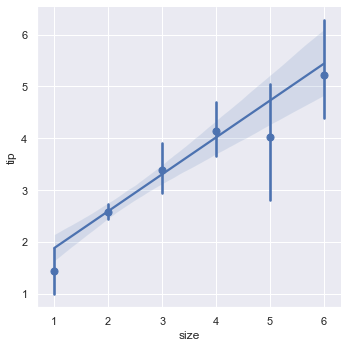

In [21]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

### Fitting different kinds of models
The way of managing hihger order shape. \
The [Anscombe’s quartet dataset](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

In [22]:
anscombe = sns.load_dataset("anscombe")

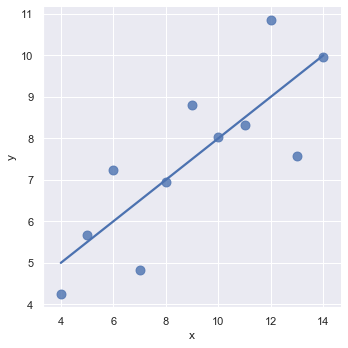

In [26]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})
# {scatter,line}_kw: sdictionaries
# Additional keyword arguments to pass to plt.scatter and plt.plot.

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

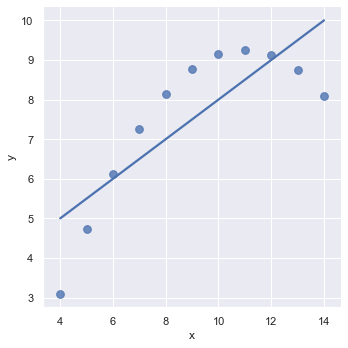

In [30]:
sns.lmplot('x', 'y', data=anscombe.query("dataset == 'II'"),
            ci=None, scatter_kws={'s':60})

In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

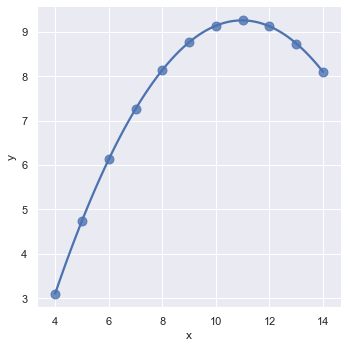

In [33]:
sns.lmplot('x', 'y', data=anscombe.query("dataset=='II'"),
          ci=None, order=2, scatter_kws={"s": 80})

A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

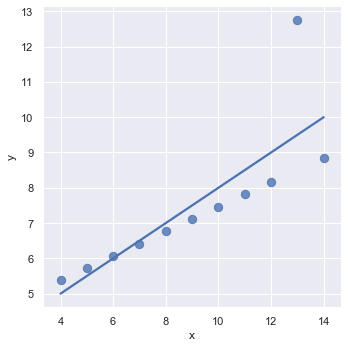

In [39]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='III'"),
          ci=None, scatter_kws={'s': 70})

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

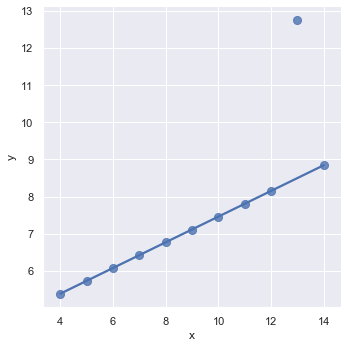

In [44]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='III'"),
           ci=None, robust=True, scatter_kws={'s': 65})
# robust: bool, optional
# If True, use statsmodels to estimate a robust regression. This will de-weight outliers
# Note: ci should be None

When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

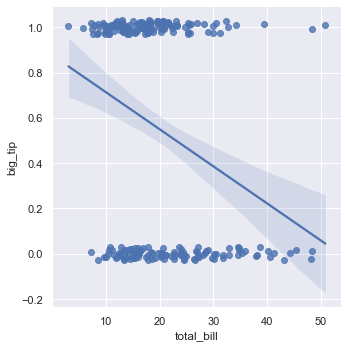

In [45]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ci=None).

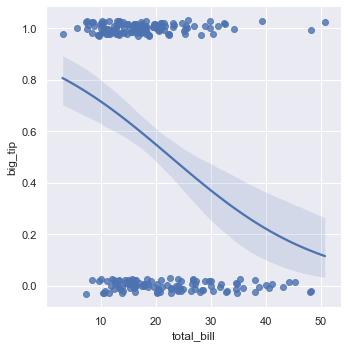

In [53]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)
# slow
# logistic is only work when Boolean data set

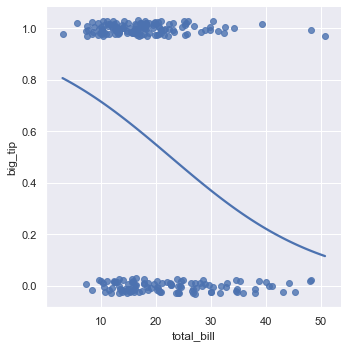

In [48]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03, ci=None)
# fast

An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

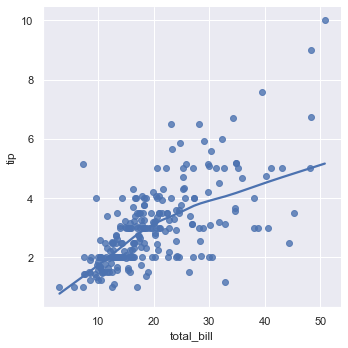

In [49]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

The [residplot()](https://seaborn.pydata.org/generated/seaborn.residplot.html#seaborn.residplot) function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

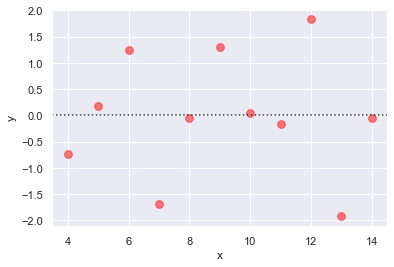

In [67]:
sns.residplot('x', 'y', data=anscombe.query("dataset=='I'"), scatter_kws={'s':60, 'alpha':0.5, 'color':'red'})

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

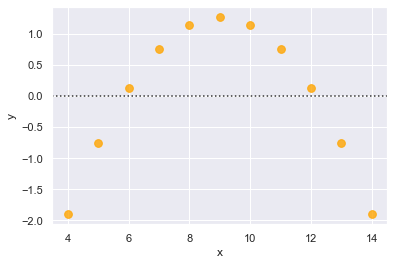

In [70]:
sns.residplot('x', 'y', data=anscombe.query("dataset=='II'"), scatter_kws={'s':60, 'color':'orange'})

### Conditioning on other variables

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?” This is where the difference between regplot() and lmplot() appears. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.